In [1]:
import sys
print(sys.executable)

/Users/zeyuli/anaconda3/envs/ECE661_HW/bin/python


In [26]:
import numpy as np
import matplotlib.pyplot as plt

x1, y1 = np.array([ 1, -2, -1, -1,  1]), 7
x2, y2 = np.array([ 2, -1,  2,  0, -2]), 1
x3, y3 = np.array([-1,  0,  2,  2,  1]), 1

x_input = np.array([x1, x2, x3]).reshape(3, 5)
y_input = np.array([y1, y2, y3])

w0 = np.zeros(5).reshape(-1, 1)
mu = 0.02
n_epochs = 200
print(x_input, y_input)

LEGEND_size = 7
TITLE_size = 12
AXLABEL_size = 9
TICK_size = 8

[[ 1 -2 -1 -1  1]
 [ 2 -1  2  0 -2]
 [-1  0  2  2  1]] [7 1 1]


In [50]:
def l1_norm_proximal_gradient(in_x, in_y, w_prev, l1_reg_param, lr):
    grad_tilde = no_normalisation_update(in_x, in_y, w_prev, l1_reg_param, lr=None) + \
                 l1_reg_param * np.sign(w_prev)
    return


def l1_norm_update(in_x, in_y, w_prev, l1_reg_param, lr):
    grad = no_normalisation_update(in_x, in_y, w_prev, l1_reg_param, lr=None) + \
           l1_reg_param * np.sign(w_prev)
    assert grad.shape == w_prev.shape
    return w_prev - lr * grad


def no_normalisation_update(in_x, in_y, w_prev, l1_reg_param, lr=None):
    """
    Args:
        in_x: x values (data)
        in_y: y values (target)
        w_prev: previous weight
        l1_reg_param: dummy
        lr: if None, it means some fn other than run_grad_descent; if run_grad_descent called it,
        must be (not None)
    Returns: either updated weight or gradient depending on lr.
    """
    n_r, n_c = in_x.shape
    grad = 0
    for inner in range(n_r):
            grad += 2 * (np.dot(in_x[inner, :], w_prev) - in_y[inner]) * in_x[inner].reshape(-1, 1)
    if lr is not None:
        return w_prev - lr * grad
    else:
        return grad


def run_grad_descent(w_init, lr, in_x, in_y, epochs, w0_prune=False, thresh=None, l1_reg_param=None,
                     grad_fn=no_normalisation_update):
    """code for gradient descent"""
    w_prev = w_init
    l_arr = []
    w_arr = np.zeros((len(w_init), epochs))
    n_r, n_c = in_x.shape
    for i in range(epochs):
        w_curr = grad_fn(in_x, in_y, w_prev, l1_reg_param, lr=lr)
        # w_curr = w_prev - lr * grad_fn(in_x, in_y, w_prev, l1_reg_param)
        if w0_prune and thresh is not None:
            w_curr_sorted_idx = np.argsort(np.abs(w_curr.flatten()))  # sort ascending
            for inner in range(len(w_init) - thresh):
                # len(w_init) - thresh = 5 - 2 = 3, so three smallest weights (absolute value) are
                # forced to zero
                w_curr[w_curr_sorted_idx[inner], 0] = 0  # zero-ing out smallest elements
        l_curr = 0
        for inner in range(n_r):
            l_curr += (np.dot(in_x[inner, :], w_curr) - in_y[inner]) ** 2
        l_arr.append(l_curr)
        w_arr[:, i] = w_curr.flatten()
        w_prev = w_curr
    return w_prev, np.array(l_arr), w_arr


def plot_log_loss_vs_n_iters(num_epochs, loss_array, save_name_, save=False,
                             plt_axis=None):
    if plt_axis is None:
        fig, ax = plt.subplots(1, 1)
    else:
        fig, ax = None, plt_axis
    ax.plot(range(num_epochs), np.log(loss_array), label='Lowest loss=%g' % np.min(loss_array))
    ax.set_xlabel('Number of Iterations', fontsize=AXLABEL_size)
    ax.set_ylabel('ln(L)', fontsize=AXLABEL_size)
    ax.set_title('Natural log of Loss vs Number of Iterations', fontsize=TITLE_size)
    ax.tick_params(axis='both', labelsize=TICK_size)
    ax.legend(loc='best', fontsize=LEGEND_size)
    if fig is not None:
        fig.tight_layout()
    if save:
        plt.savefig('%s.pdf' % save_name_, dpi=700, bbox_inches='tight')


def plot_weight_val_vs_n_iters(num_epochs, w_init, final_weights, weight_array, save_name_, save=False,
                               plt_axis=None):
    if plt_axis is None:
        fig, ax = plt.subplots(1, 1)
    else:
        fig, ax = None, plt_axis
    line_styles = ['-', ':', '--', '-.', (0, (1, 1))]
    for iii in range(len(w_init)):
        ax.plot(range(num_epochs), weight_array[iii, :], linestyle=line_styles[iii],
                linewidth=1., label='final value %.5f' % final_weights[iii])
    ax.legend(loc='best', fontsize=LEGEND_size)
    ax.tick_params(axis='both', labelsize=TICK_size)
    ax.set_xlabel('Number of Iterations', fontsize=AXLABEL_size)
    ax.set_ylabel('Value of Weights', fontsize=AXLABEL_size)
    ax.set_title('Weight Values vs Number of Iterations', fontsize=TITLE_size)
    if fig is not None:
        fig.tight_layout()
    if save:
        plt.savefig('%s.pdf' % save_name_, dpi=700, bbox_inches='tight')


def plot_many_weight_val_vs_n_iters(num_epochs, w_init, l1_reg_params, save_name_, save=False,
                                    loss_arr_lst=None, final_weights_list=None, weight_array_list=None):
    """
    Args:
        num_epochs: number of iterations (200)
        w_init: initial weights
        final_weights_list: list of weights achieved by gradient descent by default None
        weight_array_list: list of np.array that describe weight progression by default None
        loss_arr_lst: list of loss arrays (len(loss_arr_lst) corresponds to len(l1_reg_params)
        by default, loss_arr_lst=None. If not None,
        l1_reg_params: reg params (lambda)
        save_name_: name of file
        save: save or not
    Either (final_weights_list and weight_array_list are not None) or (loss_arr_lst is not None)
    Returns: None
    """
    assert (final_weights_list is not None and weight_array_list is not None) or \
        loss_arr_lst is not None, \
        "Either (final_weights_list and weight_array_list are not None) or (loss_arr_lst is not None)"
    assert not (final_weights_list is not None and weight_array_list is not None and
        loss_arr_lst is not None), "all three are not None."
    fig, ax = plt.subplots(2, 2, figsize=(10, 8))
    ax_flat = ax.flatten()
    for iii, axis in enumerate(ax_flat):
        if loss_arr_lst is None:
            plot_weight_val_vs_n_iters(num_epochs, w_init, final_weights=final_weights_list[iii],
                                       weight_array=weight_array_list[iii], save_name_=None, save=False,
                                       plt_axis=axis)
        else:
             plot_log_loss_vs_n_iters(num_epochs, loss_array=loss_arr_lst[iii], save_name_=None,
                                 save=False, plt_axis=axis)
        ax_flat[iii].set_title("lambda=%g" % l1_reg_params[iii])
    if fig is not None:
        fig.tight_layout()
    if save_name_ is not None and save:
        plt.savefig('%s.pdf' % save_name_, dpi=700, bbox_inches='tight')
    return

In [51]:
""" part b (3 pts) In Python, directly minimize the objective L without any sparsity-inducing regulariza- tion/constraint. Plot the value of log(L) vs. #steps throughout the training, and use another figure to plot how the value of each element in W is changing throughout the training. From your result, is W converging to an optimal solution? Is W converging to a sparse solution?
"""
weight, loss_arr, weight_arr = run_grad_descent(w0, mu, x_input, y_input, epochs=n_epochs)
print(weight.shape, loss_arr.shape, weight_arr.shape)

(5, 1) (200, 1) (5, 200)


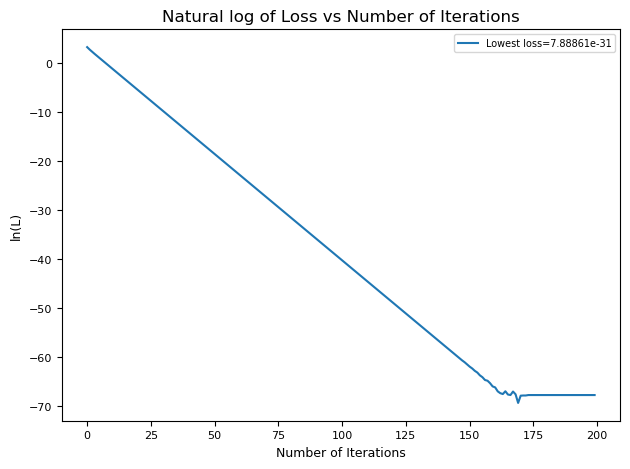

In [52]:
# part b
plot_log_loss_vs_n_iters(num_epochs=n_epochs, loss_array=loss_arr, save_name_='lab1b_loss', save=False)

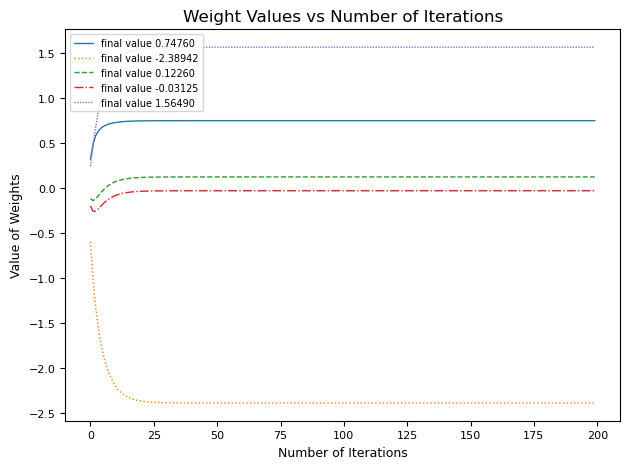

In [53]:
# part b
plot_weight_val_vs_n_iters(num_epochs=n_epochs, w_init=w0, final_weights=weight,
                           weight_array=weight_arr, save_name_='lab1b_weights', save=False)

In [54]:
"""part (c) (6 pts) Since we have the knowledge that the ground-truth weight should have ||W||0 ≤ 2, we can apply projected gradient descent to enforce this sparse constraint. Redo the optimization process in (b), this time prune the elements in W after every gradient descent step to ensure ||W^l||0 ≤ 2. Plot the value of log(L) throughout the training, and use another figure to plot the value of each element in W in each step. From your result, is W converging to an optimal solution? Is W converging to a sparse solution?"""
weight_pruned, loss_arr_pruned, weight_arr_pruned = \
    run_grad_descent(w0, mu, x_input, y_input, n_epochs, w0_prune=True, thresh=2)

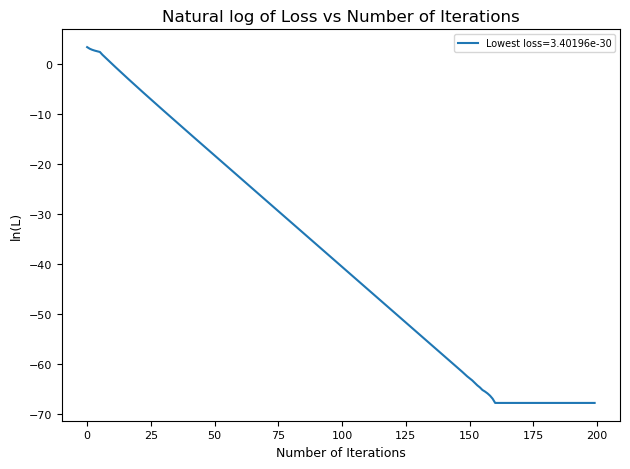

In [55]:
plot_log_loss_vs_n_iters(num_epochs=n_epochs, loss_array=loss_arr_pruned, save_name_='lab1b=c_loss',
                         save=False)

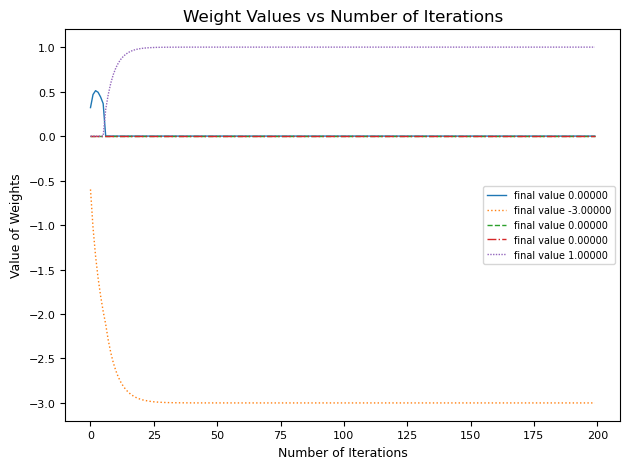

In [56]:
# part c
plot_weight_val_vs_n_iters(num_epochs=n_epochs, w_init=w0, final_weights=weight_pruned,
                           weight_array=weight_arr_pruned, save_name_='lab1c_weights', save=False)

In [59]:
"""part (d) (5 pts) In this problem we apply l1 regularization to induce the sparse solution. The minimization objective therefore changes to L + lambda||W||_1. Please use full-batch gradient descent to minimize this objective, with lambda = {0.2, 0.5, 1.0, 2.0} respectively. For each case, plot the value of log(L) throughout the training, and use another figure to plot the value of each element in W in each step. From your result, comment on the convergence performance under different lambda."""

lambda_list = [0.2, 0.5, 1.0, 2.0]
weight_l1_list, loss_l1_list, weight_arr_l1_list = [], [], []
for idx, lll in enumerate(lambda_list):
    weight_l1, loss_arr_l1, weight_arr_l1 = run_grad_descent(w0, mu, x_input, y_input, n_epochs,
                                                             w0_prune=False, thresh=None,
                                                             l1_reg_param=lambda_list[idx],
                                                             grad_fn=l1_norm_update)
    weight_l1_list.append(weight_l1)
    loss_l1_list.append(loss_arr_l1)
    weight_arr_l1_list.append(weight_arr_l1)


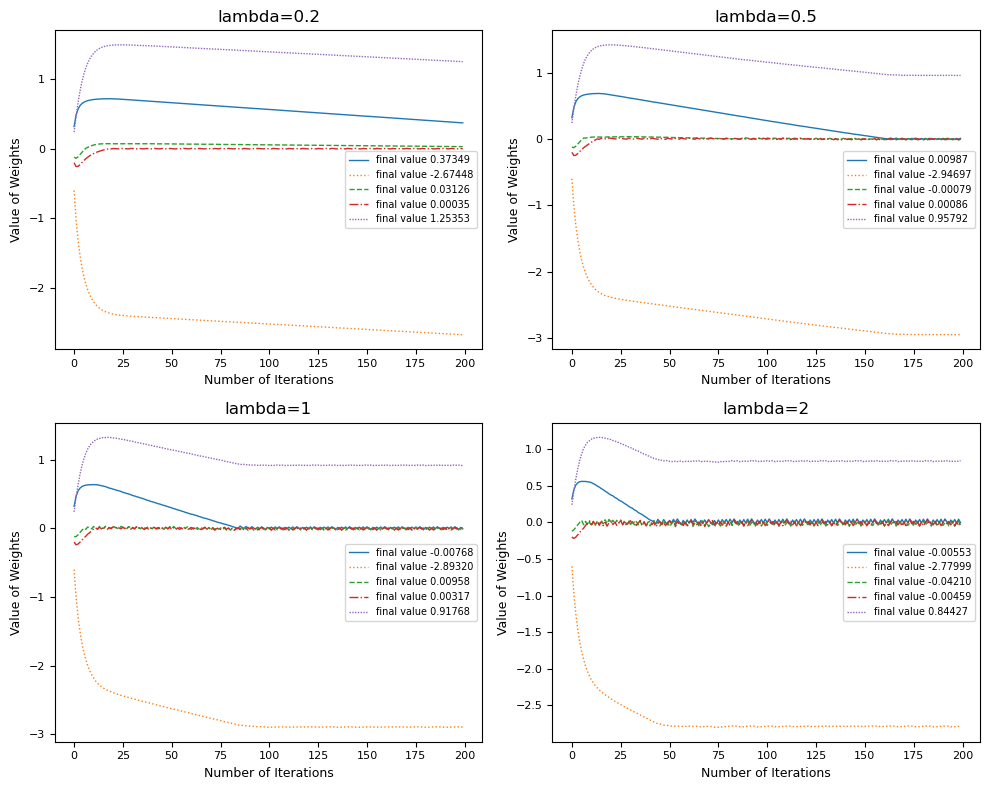

In [60]:
plot_many_weight_val_vs_n_iters(num_epochs=n_epochs, w_init=w0, final_weights_list=weight_l1_list,
                                weight_array_list=weight_arr_l1_list, loss_arr_lst=None,
                                l1_reg_params=lambda_list, save_name_=None, save=False)

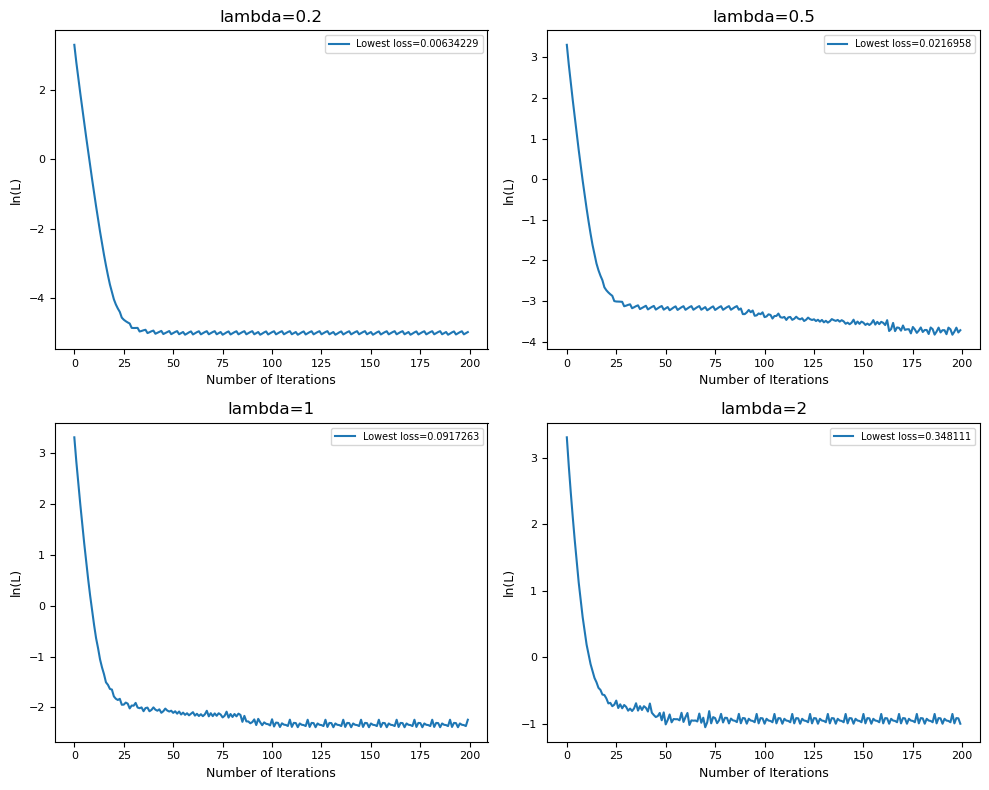

In [61]:
plot_many_weight_val_vs_n_iters(num_epochs=n_epochs, w_init=w0, final_weights_list=None,
                                weight_array_list=None, loss_arr_lst=loss_l1_list,
                                l1_reg_params=lambda_list, save_name_=None, save=False)